<a href="https://colab.research.google.com/github/cuongle2002/AI-/blob/main/AI_WEEK_10(8_4_2023%2C_ANN)ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import cifar100
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
y_test.shape

(10000, 1)

In [ ]:
class_name = ['	beaver', 'dolphin' ' otter', 'seal','whale', 'aquarium fish', 'flatfish', 'ray', 'shark', 'trout', 'orchids', 'poppies', 'roses', 'sunflowers', 'tulips',
              'bottles', 'bowls', 'cans', 'cups', 'plates', 'apples', 'mushrooms', 'oranges', 'pears', 'sweet peppers','clock','computer keyboard','lamp','telephone','television',
              'bed','chair','couch','table','wardrobe','bee','beetle','butterfly','caterpillar','cockroach','bear', 'leopard', 'lion', 'tiger', 'wolf','bridge', 'castle', 'house', 'road', 'skyscraper',
              'cloud', 'forest', 'mountain', 'plain, sea',	'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo','	fox', 'porcupine', 'possum', 'raccoon', 'skunk',
              	'crab', 'lobster', 'snail', 'spider', 'worm','	baby', 'boy', 'girl', 'man', 'woman','crocodile', 'dinosaur', 'lizard', 'snake', 'turtle','hamster', 'mouse', 'rabbit', 'shrew', 'squirrel','maple', 'oak', 'palm', 'pine', 'willow',
              	'bicycle', 'bus', 'motorcycle', 'pickup truck', 'train','	lawn-mower', 'rocket', 'streetcar', 'tank', 'tractor']

/usr/local/lib/python3.9/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


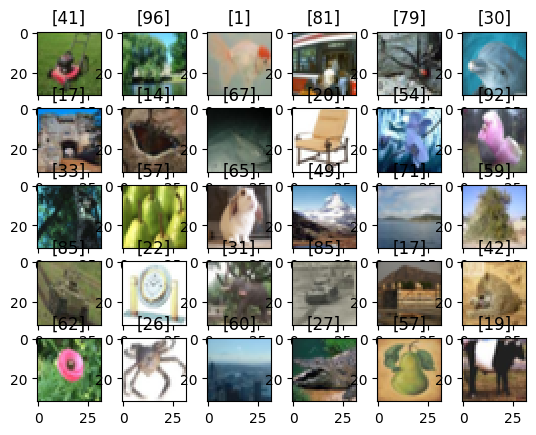

In [ ]:
import matplotlib.pyplot as plt 
for i in range(30):
  plt.subplot(5,6,i+1)
  plt.imshow(x_train[500+i])
  plt.title(y_train[500+i])
plt.show()

In [ ]:
x_train = x_train.reshape(50000,32*32*3)


In [ ]:
x_train, x_test = x_train/255.0, x_test/255.0

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten         #Flatten: làm 1 thành chuỗi phẳng 
from keras.utils import to_categorical

y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)


model = Sequential()
model.add(Dense(500,activation='relu',input_shape = (32*32*3,)))
#model.add(Flatten(input_shape=[32,32,3]))
#model.add(Dense(500, activation = 'relu'))
model.add(Dense(300,activation = 'relu'))
model.add(Dense(100,activation = 'softmax'))
model.summary()





Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 500)               1536500   
                                                                 
 dense_7 (Dense)             (None, 300)               150300    
                                                                 
 dense_8 (Dense)             (None, 100)               30100     
                                                                 
Total params: 1,716,900
Trainable params: 1,716,900
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_train.shape

(50000, 100)

In [ ]:
y_test.shape

(10000, 100)

In [ ]:
from keras.metrics import Accuracy
model.compile(loss='Sparse_ categorical_crossentropy',optimizer='sgd', metrics = ['Accuracy'])

model.fit(x_train,y_train,epochs=30)

Epoch 1/30


ValueError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


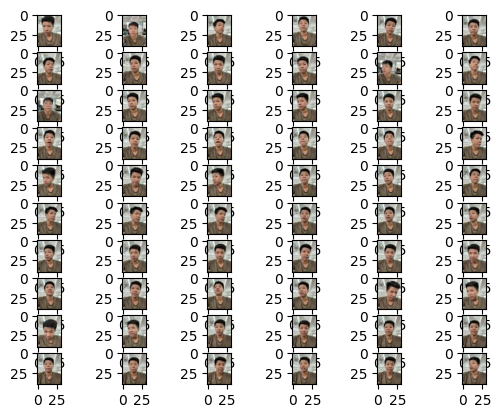

In [ ]:

import matplotlib.pyplot as plt 
from matplotlib.image import imread 

folder = '/content/drive/MyDrive/iloveimg-resized/'
for i in range(60):
  plt.subplot(10,6,i+1)
  filename = folder + 'Cuong'+str(i+1)+'.jpg'
  img = imread(filename) 
  plt.imshow(img)

plt.show()

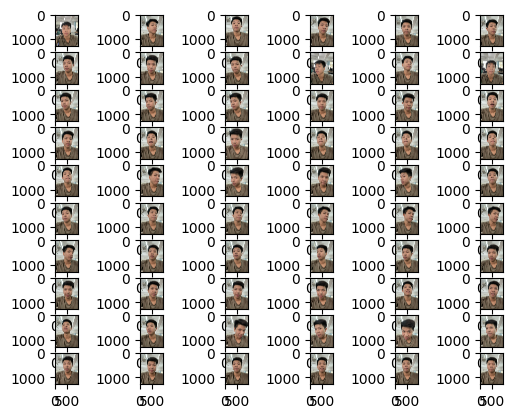

In [ ]:

# chua scale

import matplotlib.pyplot as plt 
from matplotlib.image import imread 

folder = '/content/drive/MyDrive/NOTSCALE/'
for i in range(60):
  plt.subplot(10,6,i+1)
  filename = folder + 'Cuong'+str(i+1)+'.jpg'
  img = imread(filename) 
  plt.imshow(img)

plt.show()

In [ ]:
from os import listdir 
from numpy import asarray 
from numpy import save 
from keras.utils import load_img, img_to_array
folder = '/content/drive/MyDrive/iloveimg-resized/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('Cuong'):
    output = 1 
  if file.startswith('l'):
    output = 2
  img = load_img(folder + file)
  photo = img_to_array(img)
  photos.append(photo)
  labels.append(output)

photos = asarray(photo)
labels = asarray(labels)

print(photos.shape, labels.shape)

save('/content/drive/MyDrive/iloveimg-resized/Cuong_Luan_photos.npy', photos)
save('/content/drive/MyDrive/iloveimg-resized/Luan_Cuong_photos.npy', labels)




(40, 30, 3) (119,)


In [ ]:
import pandas as pd 
data = pd.read_csv('/content/Diabetes.csv')
data.head()


,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [ ]:
x = data.iloc[:, 0:8]
y = data.iloc[:,8]

x.shape

(767, 8)

In [ ]:
y.shape

(767,)

In [ ]:
import seaborn as sns
from seaborn import pairplot

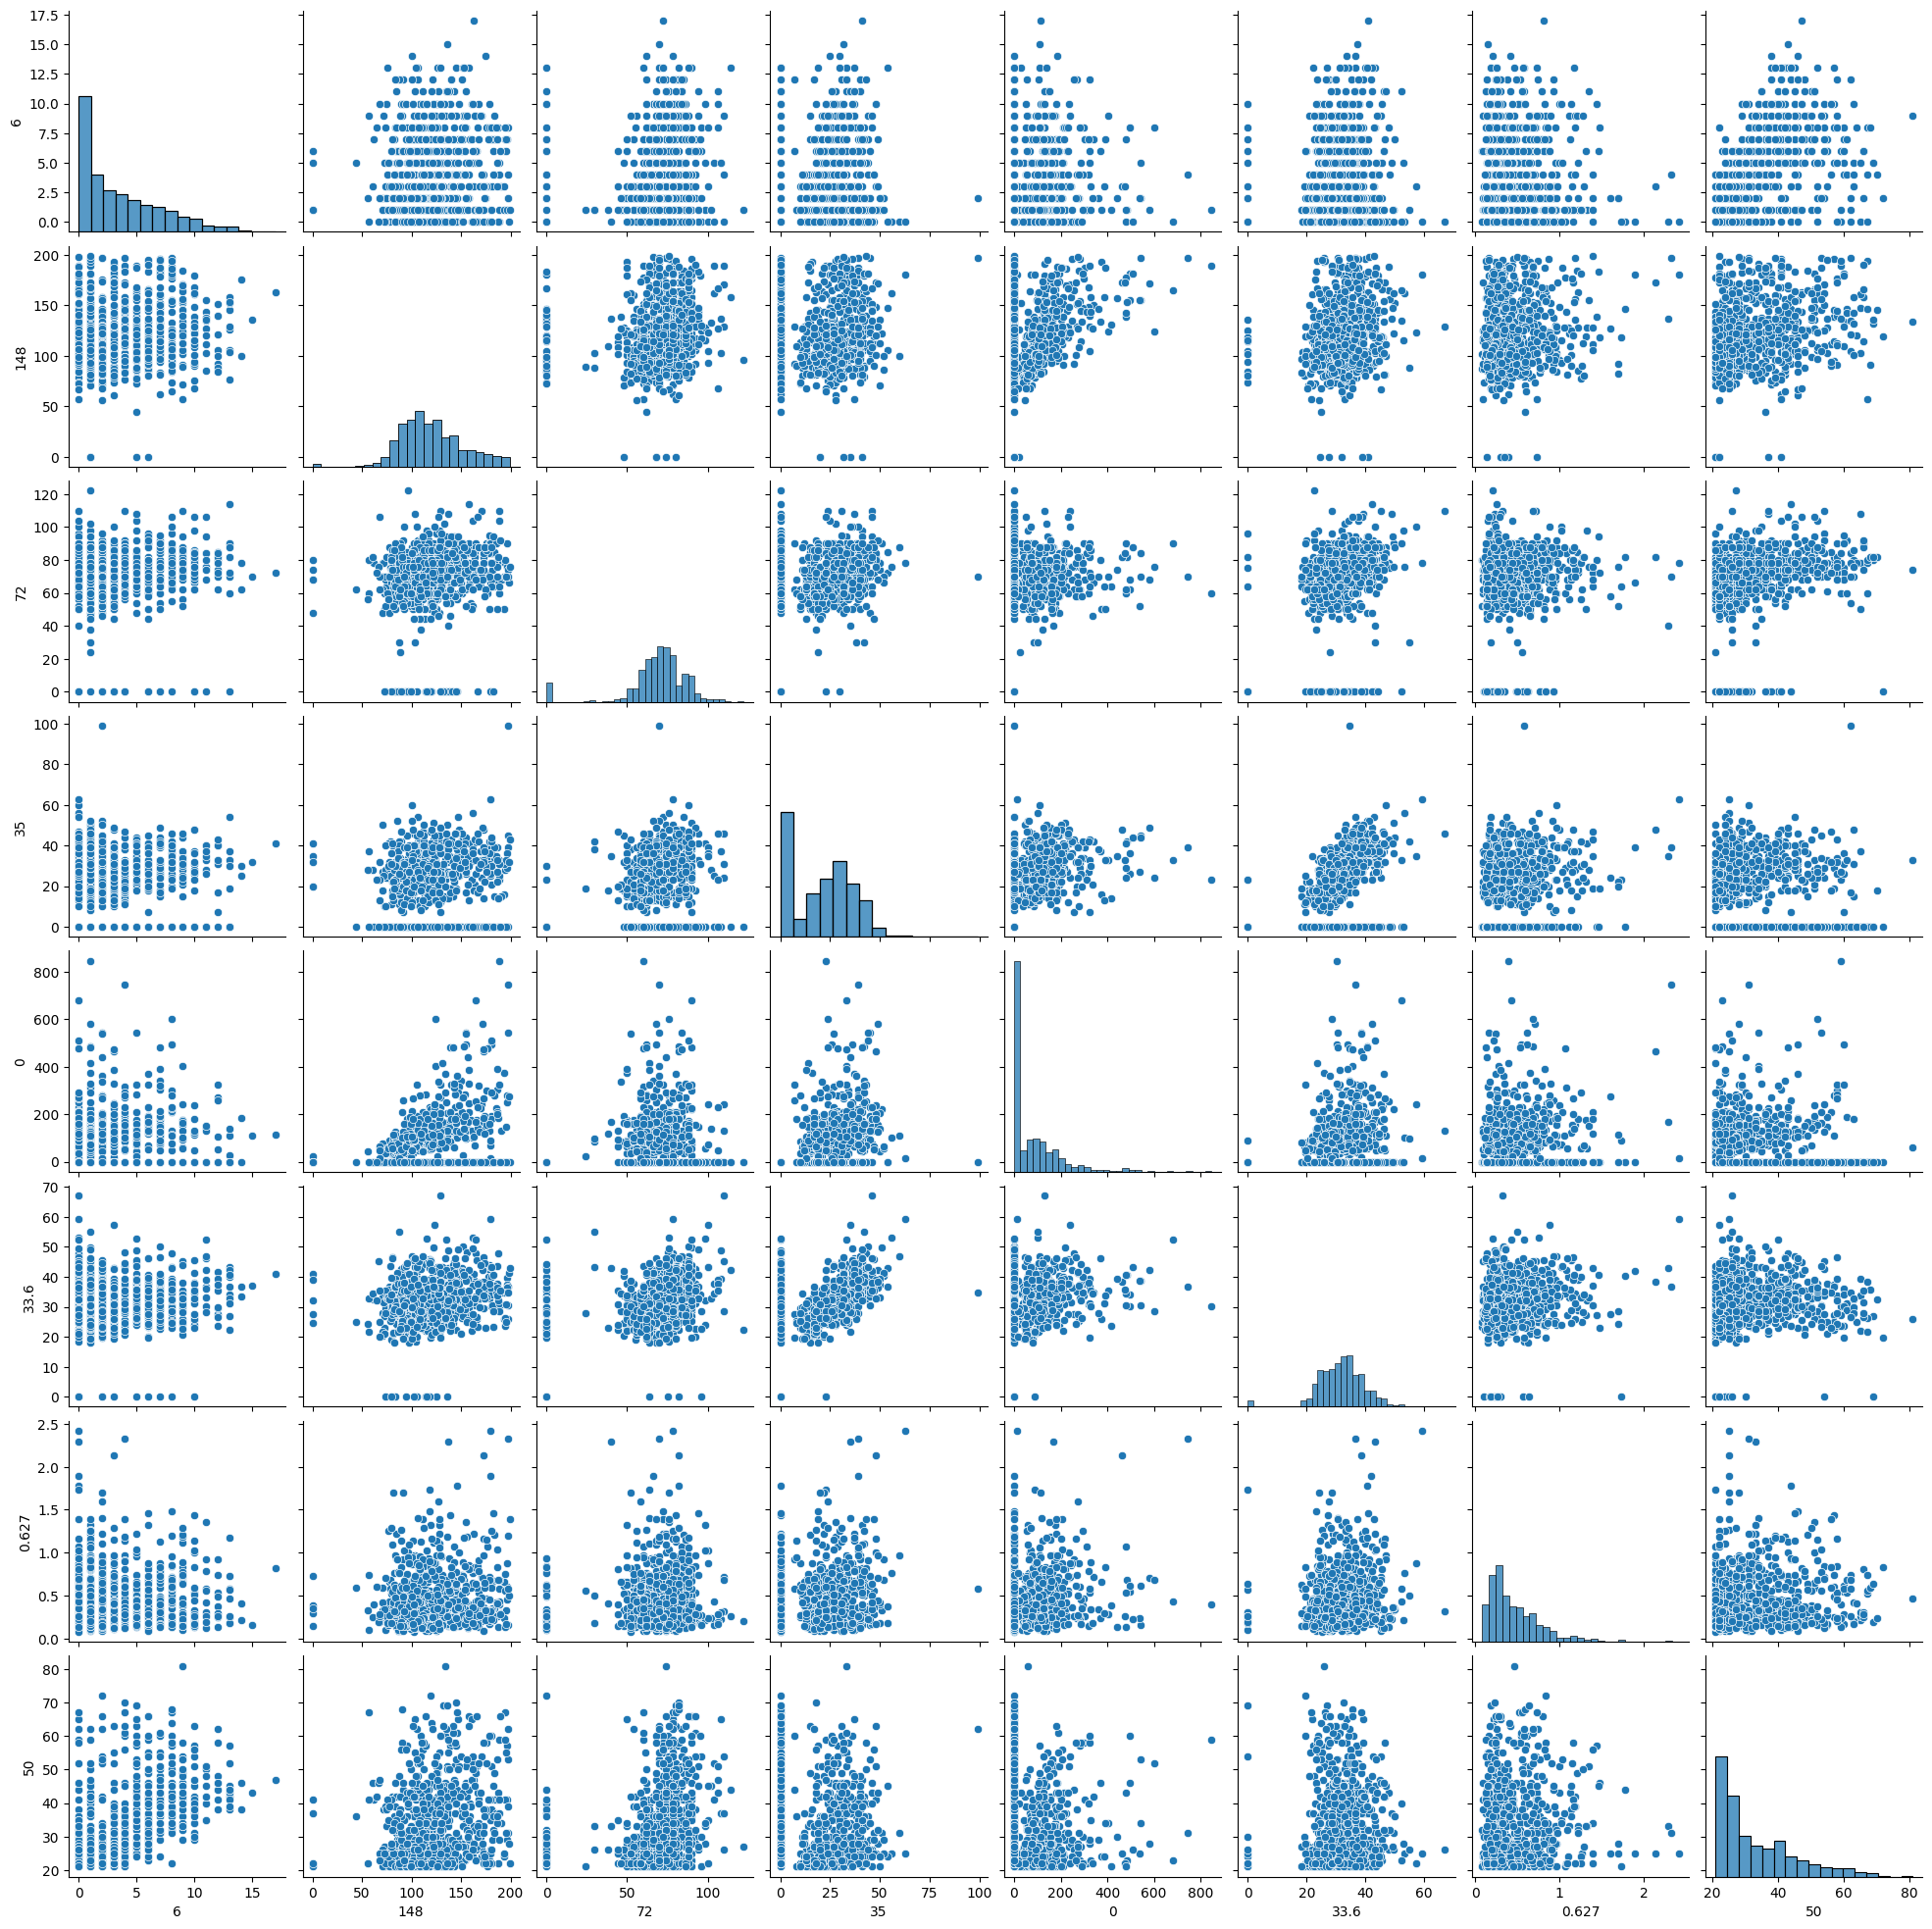

In [ ]:
sns.pairplot(x)

In [ ]:
correlation = data.corr()
print(correlation)

              6       148        72        35         0      33.6     0.627  \
6      1.000000  0.128846  0.141197 -0.082495 -0.072999  0.017518 -0.033927   
148    0.128846  1.000000  0.152498  0.056381  0.332383  0.220955  0.136903   
72     0.141197  0.152498  1.000000  0.207308  0.089098  0.281777  0.041180   
35    -0.082495  0.056381  0.207308  1.000000  0.437974  0.392553  0.183498   
0     -0.072999  0.332383  0.089098  0.437974  1.000000  0.198111  0.185579   
33.6   0.017518  0.220955  0.281777  0.392553  0.198111  1.000000  0.140546   
0.627 -0.033927  0.136903  0.041180  0.183498  0.185579  0.140546  1.000000   
50     0.544018  0.262408  0.239571 -0.115873 -0.040942  0.035911  0.032738   
1      0.221087  0.465856  0.064882  0.073265  0.131984  0.292695  0.173245   

             50         1  
6      0.544018  0.221087  
148    0.262408  0.465856  
72     0.239571  0.064882  
35    -0.115873  0.073265  
0     -0.040942  0.131984  
33.6   0.035911  0.292695  
0.627  0.0327

<Axes: >

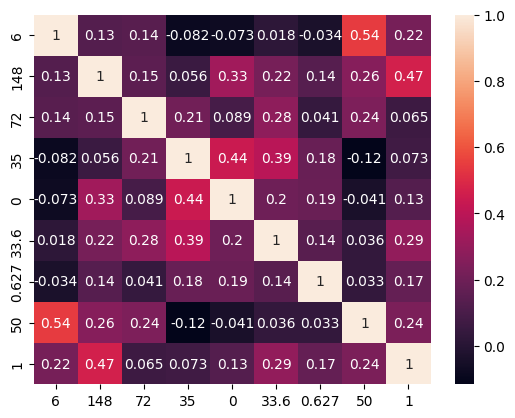

In [ ]:
import seaborn as sns 
sns.heatmap(correlation, annot=True )

In [ ]:
from keras.models import Sequential 
from keras.layers import Dense 

model = Sequential()
model.add(Dense(12,activation = 'relu', input_shape = (8,)))
model.add(Dense(8,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer ='adam',metrics=['accuracy'])
model.fit(x,y,epochs = 150, batch_size = 10)
_,accuracy = model.evaluate(x,y)
print('Độ chĩnh xác mô hình :%2f' %(accuracy*100))

Epoch 1/150
77/77 [==============================] - 2s 3ms/step - loss: 13.5640 - accuracy: 0.5958
Epoch 2/150
77/77 [==============================] - 0s 4ms/step - loss: 2.3950 - accuracy: 0.5724
Epoch 3/150
77/77 [==============================] - 0s 4ms/step - loss: 1.4477 - accuracy: 0.6245
Epoch 4/150
77/77 [==============================] - 0s 3ms/step - loss: 1.1219 - accuracy: 0.6336
Epoch 5/150
77/77 [==============================] - 0s 4ms/step - loss: 0.9214 - accuracy: 0.6493
Epoch 6/150
77/77 [==============================] - 0s 4ms/step - loss: 0.8518 - accuracy: 0.6793
Epoch 7/150
77/77 [==============================] - 0s 3ms/step - loss: 0.7971 - accuracy: 0.6571
Epoch 8/150
77/77 [==============================] - 0s 4ms/step - loss: 0.6986 - accuracy: 0.6975
Epoch 9/150
77/77 [==============================] - 0s 4ms/step - loss: 0.7058 - accuracy: 0.6819
Epoch 10/150
77/77 [==============================] - 0s 3ms/step - loss: 0.7723 - accuracy: 0.6623
Epoch 11

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(x)
x_train_std = sc.transform(x)

model = Sequential()
model.add(Dense(12,activation = 'relu', input_shape = (8,)))
model.add(Dense(8,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer ='adam',metrics=['accuracy'])
model.fit(x_train_std,y,epochs = 1000, batch_size = 10)
_,accuracy = model.evaluate(x_train_std,y)
print('Độ chĩnh xác mô hình :%2f' %(accuracy*100))



# print(x[:5], x_train_std[:5])


Epoch 1/1000
77/77 [==============================] - 3s 9ms/step - loss: 0.6490 - accuracy: 0.6532
Epoch 2/1000
77/77 [==============================] - 1s 8ms/step - loss: 0.5941 - accuracy: 0.6806
Epoch 3/1000
77/77 [==============================] - 1s 9ms/step - loss: 0.5501 - accuracy: 0.7132
Epoch 4/1000
77/77 [==============================] - 1s 10ms/step - loss: 0.5196 - accuracy: 0.7405
Epoch 5/1000
77/77 [==============================] - 1s 8ms/step - loss: 0.4975 - accuracy: 0.7562
Epoch 6/1000
77/77 [==============================] - 1s 8ms/step - loss: 0.4831 - accuracy: 0.7679
Epoch 7/1000
77/77 [==============================] - 1s 7ms/step - loss: 0.4750 - accuracy: 0.7757
Epoch 8/1000
77/77 [==============================] - 1s 8ms/step - loss: 0.4691 - accuracy: 0.7862
Epoch 9/1000
77/77 [==============================] - 1s 8ms/step - loss: 0.4638 - accuracy: 0.7875
Epoch 10/1000
77/77 [==============================] - 0s 6ms/step - loss: 0.4605 - accuracy: 0.787